# Generating a Tree Using a Tutorial
### Julien Dhouti

We first import all of the libraries that we need.

In [3]:
library(readr)
library(dplyr)
library(rpart)
library(rpart.plot)
library(ROCR)
set.seed(100)

We import the data using the `read_csv()` function from the `readr` library. From this, we select only the columns that we may need such as:
* Survived
* Embarked
* Sex
* SibSp
* Parch
* Fare

And we factor the categorical columns so that we can use them in the tree algorithm. We can do this using the `mutate()` function.

In [24]:
titanic3 <- read_csv('datasets/train_edited.csv') %>% select(Survived, Embarked, Sex, SibSp, Parch, Fare) %>% 
mutate(Embarked = factor(Embarked), Sex = factor(Sex))

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Embarked = col_character()
)


In [26]:
dat <- c("training", "test") %>%
  sample(nrow(titanic3), replace = T) %>%
  split(titanic3, .)

Display the graph to determine which attributes are worth the most.

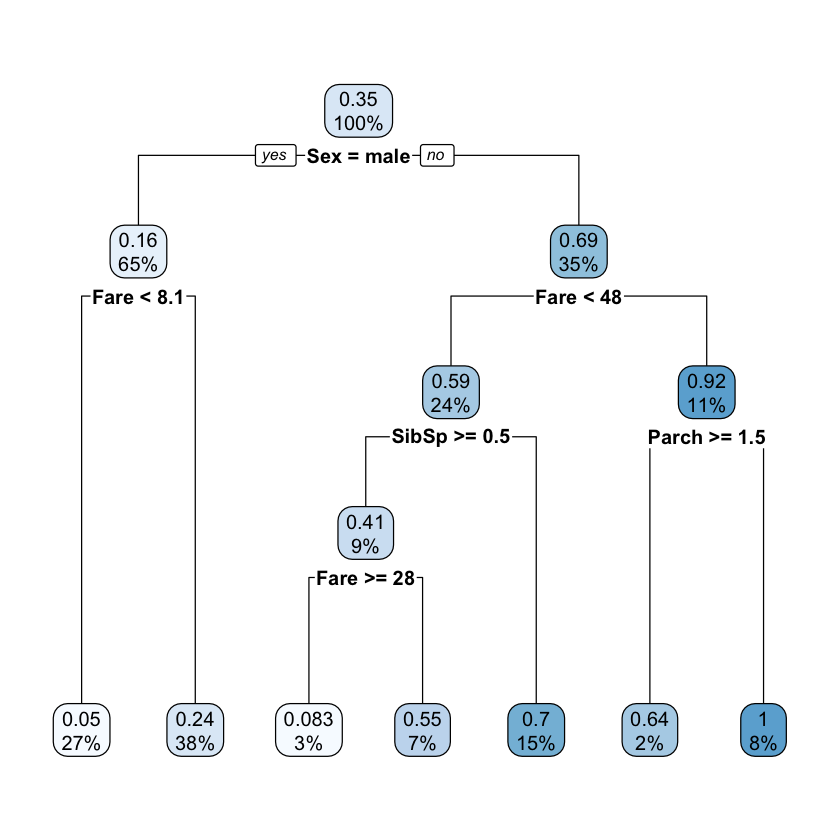

In [28]:
rtree_fit <- rpart(Survived ~ ., 
                   dat$training)
rpart.plot(rtree_fit)